# **Data Modeling Home Credit Indonesia**

## Import Library

In [2]:
pip install scorecardpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
pip install pandas==1.3.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scorecardpy as sc
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

## Import Dataset

In [5]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
link = 'https://drive.google.com/file/d/1IdpB4zroZ-PPqoh97BzYarfyGHFZdLMh/view'
import pandas as pd

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('df_preprocessing.csv')

data = pd.read_csv('df_preprocessing.csv')
print(data)

        Unnamed: 0  SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  \
0                0      100002       1                   1            1   
1                1      100003       0                   1            0   
2                2      100004       0                   0            1   
3                3      100006       0                   1            0   
4                4      100007       0                   1            1   
...            ...         ...     ...                 ...          ...   
252132      307504      456248       0                   1            0   
252133      307506      456251       0                   1            1   
252134      307508      456253       0                   1            0   
252135      307509      456254       1                   1            0   
252136      307510      456255       0                   1            0   

        FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
0                  0      

In [7]:
dt_s = sc.var_filter(data, y='TARGET',var_rm=['SK_ID_CURR','REG_CITY_NOT_WORK_CITY','REG_CITY_NOT_LIVE_CITY'],var_kp = ['FLAG_PHONE','CNT_CHILDREN','FLAG_OWN_CAR','NAME_FAMILY_STATUS'])

[INFO] filtering variables ...
Variable filtering on 252137 rows and 37 columns in 00:06:44 
14 variables are removed


In [8]:
dt_s.head()

,AGE,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,CNT_CHILDREN,CODE_GENDER,EMP_LENGTH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_OWN_CAR,FLAG_PHONE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_INCOME_TYPE,OCCUPATION_TYPE,PHONE_CHANGE_LENGTH,PUBLISH_LENGTH,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGIST_LENGTH,TARGET
0,26.0,24700.5,406597.5,351000.0,202500.0,0,1,2.0,0.083037,0.262949,0.139376,0,1,Secondary / secondary special,Single / not married,Working,Labour Job,3.0,6.0,0.018801,2,10.0,1
1,46.0,35698.5,1293502.5,1129500.0,270000.0,0,0,3.0,0.311267,0.622246,0.000000,0,1,Higher education,Married,State servant,Office Job,2.0,1.0,0.003541,1,3.0,0
2,52.0,6750.0,135000.0,135000.0,67500.0,0,1,1.0,0.000000,0.555912,0.729567,1,1,Secondary / secondary special,Single / not married,Working,Labour Job,2.0,7.0,0.010032,2,12.0,0
3,52.0,29686.5,312682.5,297000.0,135000.0,0,0,8.0,0.000000,0.650442,0.000000,0,0,Secondary / secondary special,Married,Working,Labour Job,2.0,7.0,0.008019,2,27.0,0
4,55.0,21865.5,513000.0,513000.0,121500.0,0,1,8.0,0.000000,0.322738,0.000000,0,0,Secondary / secondary special,Single / not married,Working,Office Job,3.0,9.0,0.028663,2,12.0,0


[INFO] creating woe binning ...
Binning on 252137 rows and 23 columns in 00:00:39


{'REGION_POPULATION_RELATIVE': <Figure size 640x480 with 2 Axes>,
 'NAME_EDUCATION_TYPE': <Figure size 640x480 with 2 Axes>,
 'EXT_SOURCE_1': <Figure size 640x480 with 2 Axes>,
 'REGION_RATING_CLIENT': <Figure size 640x480 with 2 Axes>,
 'AMT_CREDIT': <Figure size 640x480 with 2 Axes>,
 'AMT_GOODS_PRICE': <Figure size 640x480 with 2 Axes>,
 'EXT_SOURCE_3': <Figure size 640x480 with 2 Axes>,
 'NAME_FAMILY_STATUS': <Figure size 640x480 with 2 Axes>,
 'EXT_SOURCE_2': <Figure size 640x480 with 2 Axes>,
 'CNT_CHILDREN': <Figure size 640x480 with 2 Axes>,
 'FLAG_PHONE': <Figure size 640x480 with 2 Axes>,
 'PUBLISH_LENGTH': <Figure size 640x480 with 2 Axes>,
 'FLAG_OWN_CAR': <Figure size 640x480 with 2 Axes>,
 'AGE': <Figure size 640x480 with 2 Axes>,
 'REGIST_LENGTH': <Figure size 640x480 with 2 Axes>,
 'CODE_GENDER': <Figure size 640x480 with 2 Axes>,
 'AMT_INCOME_TOTAL': <Figure size 640x480 with 2 Axes>,
 'PHONE_CHANGE_LENGTH': <Figure size 640x480 with 2 Axes>,
 'OCCUPATION_TYPE': <Figur

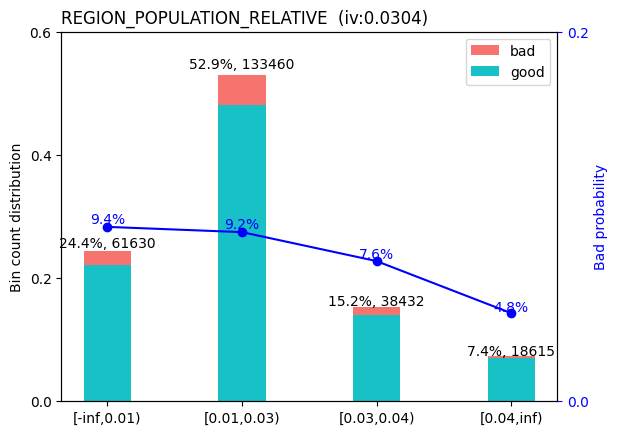

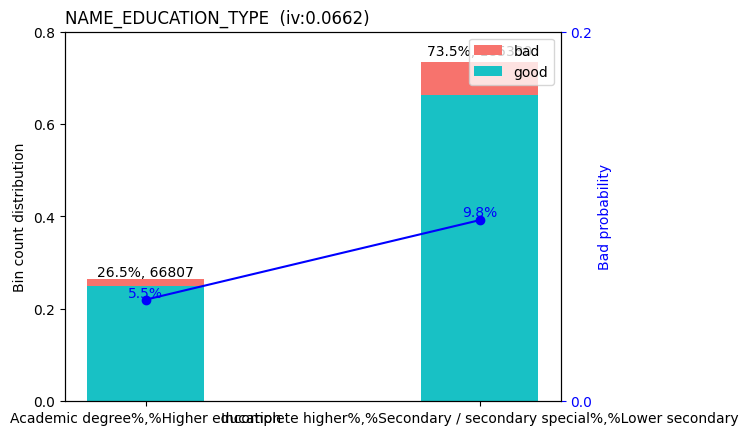

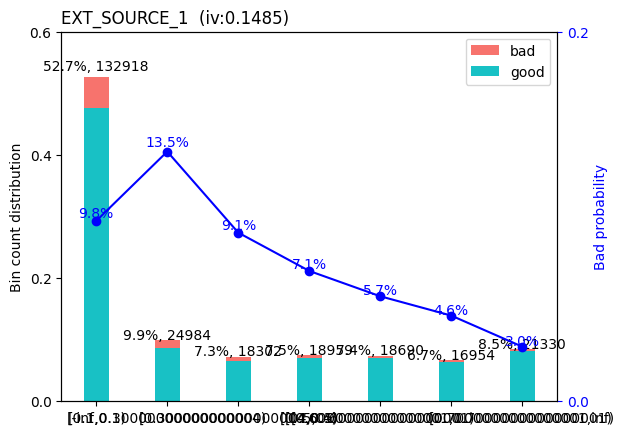

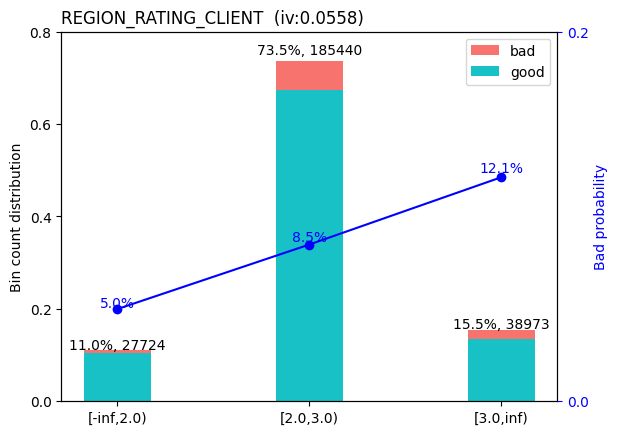

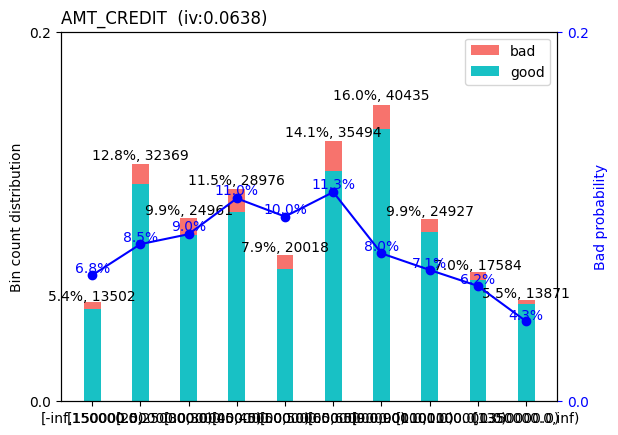

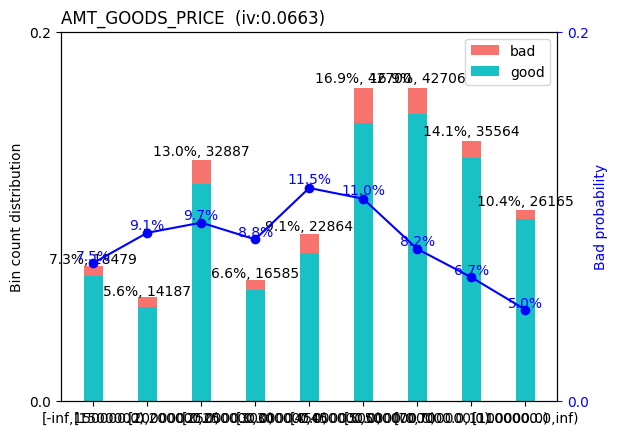

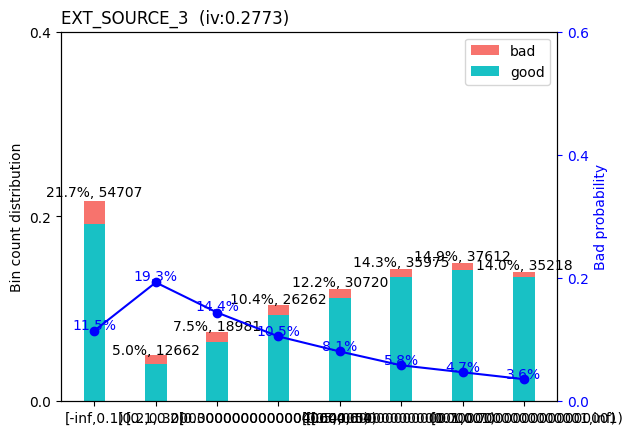

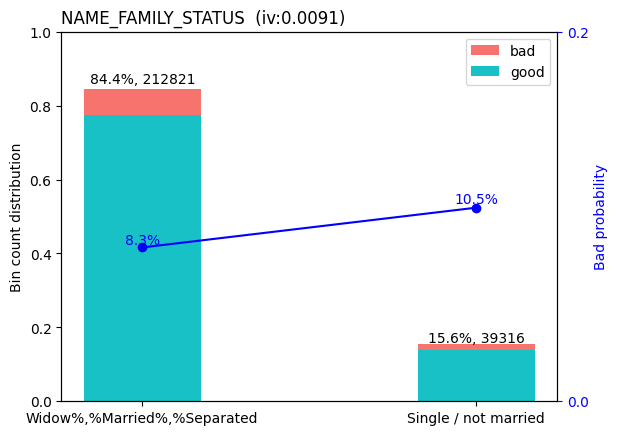

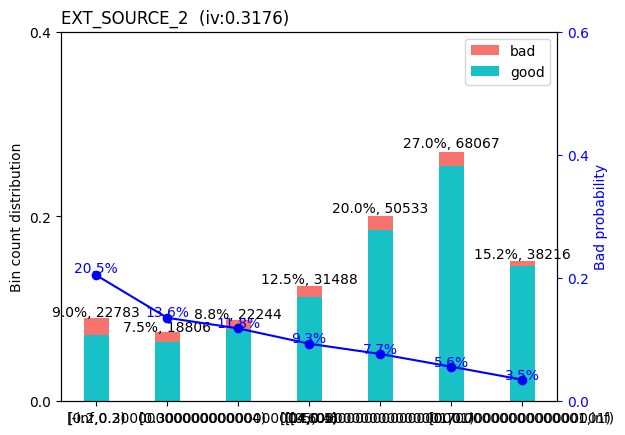

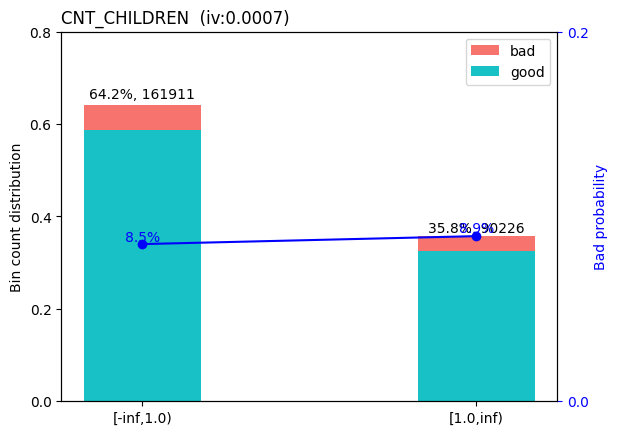

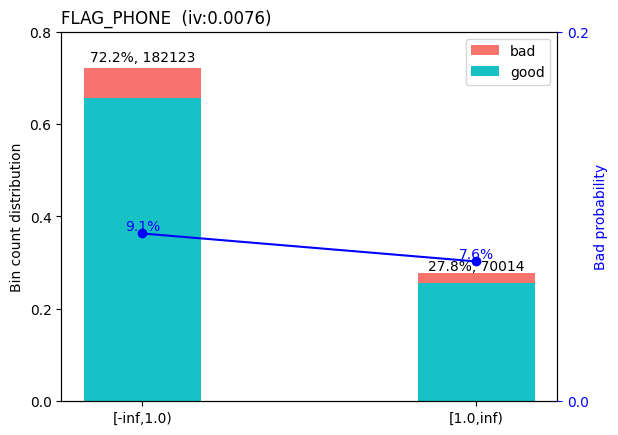

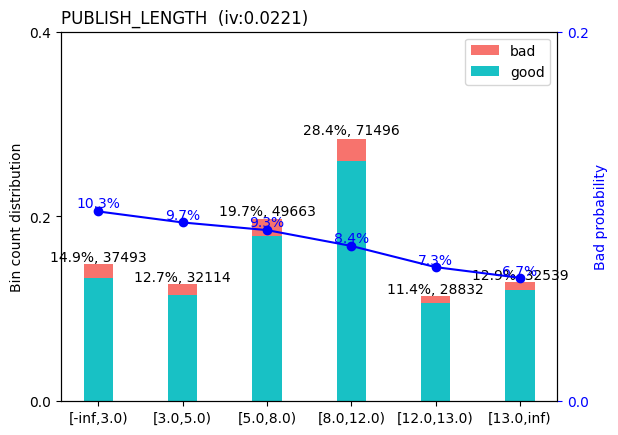

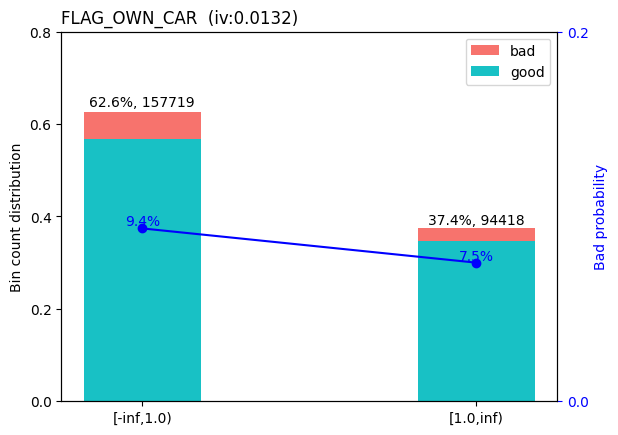

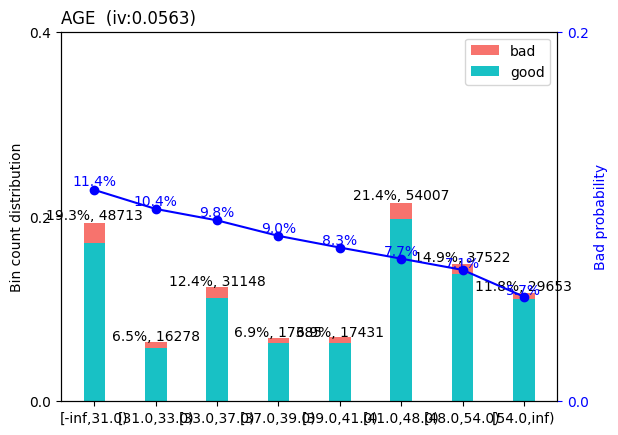

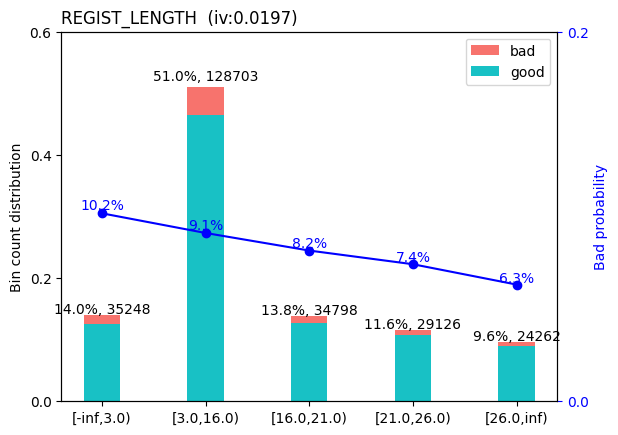

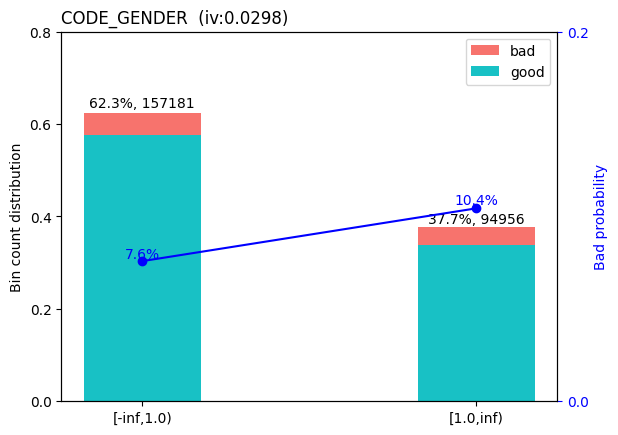

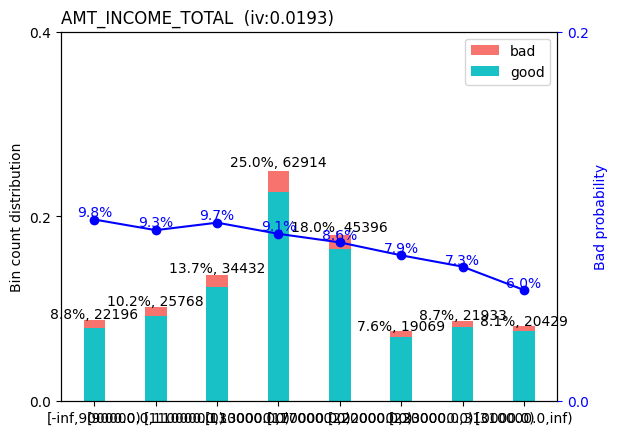

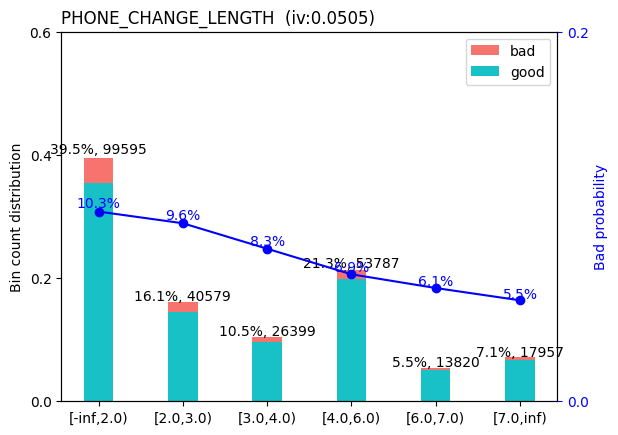

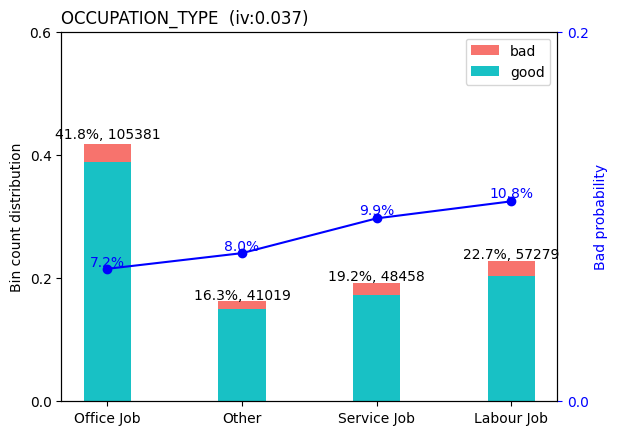

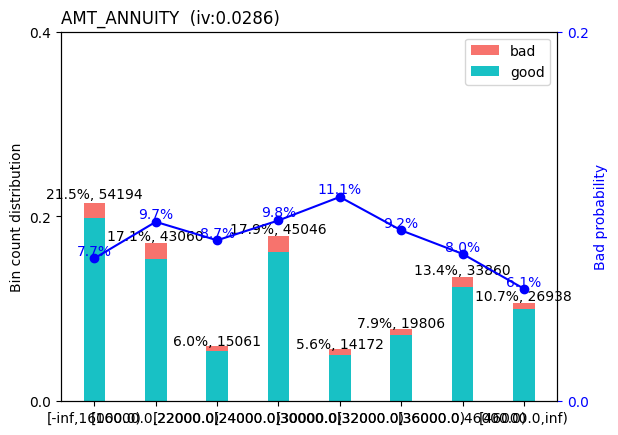

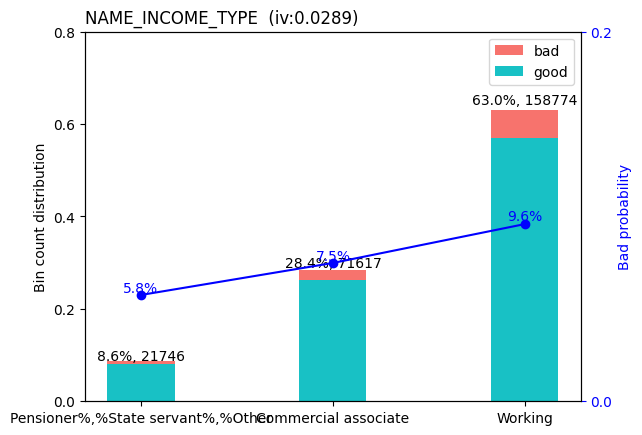

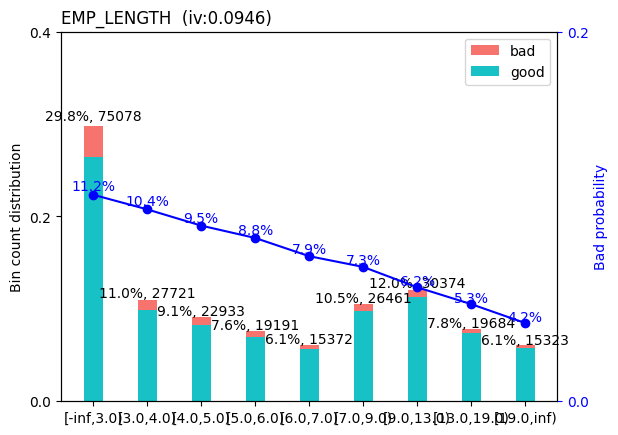

In [9]:
bins = sc.woebin(dt_s, y="TARGET",bin_num_limit=10,method = "chimerge")
sc.woebin_plot(bins)

In [10]:
train, test = sc.split_df(dt_s, 'TARGET',ratio = 0.7,seed = 24).values()

In [11]:
# converting train and test into woe values
train_woe = sc.woebin_ply(train, bins = bins)
test_woe = sc.woebin_ply(test, bins = bins)
y_train = train_woe.loc[:,'TARGET']
X_train = train_woe.loc[:,train_woe.columns != 'TARGET']
y_test = test_woe.loc[:,'TARGET']
X_test = test_woe.loc[:,train_woe.columns != 'TARGET']

[INFO] converting into woe values ...
Woe transformating on 176495 rows and 22 columns in 00:00:13
[INFO] converting into woe values ...


In [12]:
from imblearn.over_sampling import SMOTE 

In [13]:
# Handle Imbalance Target Using SMOTE
sm = SMOTE(random_state=24)
sm.fit(X_train, y_train)
X_smote, y_smote = sm.fit_resample(X_train, y_train)
X_smote.shape, X_train.shape, y_smote.shape, y_train.shape

((322422, 22), (176495, 22), (322422,), (176495,))

## Modeling

In [14]:
param = {
    'penalty' : ['none', 'l2', 'l1', 'elasticnet'],
    'C' : [float(x) for x in np.linspace(start=0, stop=1, num=75)],
    'solver' : ['lbfgs','saga','liblinear']
     }

logreg = LogisticRegression()

# search
logreg_clf = RandomizedSearchCV(logreg,
                            param,
                            scoring='roc_auc',
                            cv=5,
                            random_state = 24) 

search_logreg = logreg_clf.fit(X_smote,y_smote)
# best hyperparameters
search_logreg.best_params_

{'solver': 'saga', 'penalty': 'none', 'C': 0.33783783783783783}

In [15]:
best_params = search_logreg.best_params_
logreg_tuning = LogisticRegression(**best_params)
logreg_tuning.fit(X_smote,y_smote)

LogisticRegression(C=0.33783783783783783, penalty='none', solver='saga')

In [29]:
# predicted proability
train_pred = logreg_tuning.predict_proba(X_train)[:,1]
test_pred = logreg_tuning.predict_proba(X_test)[:,1]

In [31]:
# score ------
card = sc.scorecard(bins,logreg_tuning, X_train.columns)
# credit score
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)

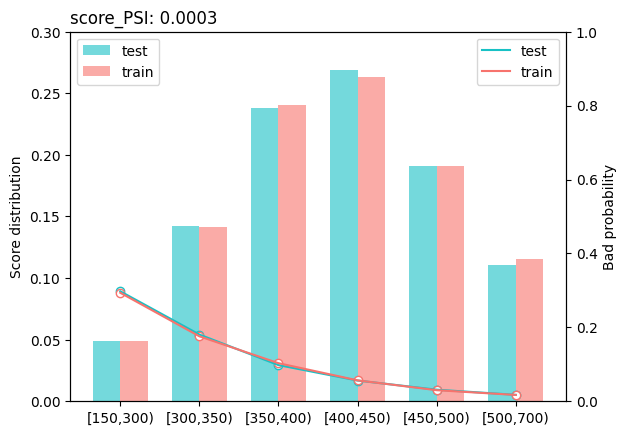

{'psi':   variable       PSI
 0    score  0.000326,
 'pic': {'score': <Figure size 640x480 with 2 Axes>}}

In [32]:
# psi
sc.perf_psi(
  score = {'train':train_score, 'test':test_score},
  label = {'train':y_train, 'test':y_test}
)

In [35]:
def score_bin_sort(score, label=None, title=None, x_limits=None, x_tick_break=50, seed=186):
    # inputs checking
    ## score
    if not isinstance(score, dict) and len(score) != 2:
        raise Exception("Incorrect inputs; score should be a dictionary with two elements.")
    else:
        if any([not isinstance(i, pd.DataFrame) for i in score.values()]):
            raise Exception("Incorrect inputs; score is a dictionary of two dataframes.")
        score_columns = [list(i.columns) for i in score.values()]
        if set(score_columns[0]) != set(score_columns[1]):
            raise Exception("Incorrect inputs; the column names of two dataframes in score should be the same.")
    ## label
    if label is not None:
        if not isinstance(label, dict) and len(label) != 2:
            raise Exception("Incorrect inputs; label should be a dictionary with two elements.")
        else:
            if set(score.keys()) != set(label.keys()):
                raise Exception("Incorrect inputs; the keys of score and label should be the same. ")
            for i in label.keys():
                if isinstance(label[i], pd.DataFrame):
                    if len(label[i].columns) == 1:
                        label[i] = label[i].iloc[:,0]
                    else:
                        raise Exception("Incorrect inputs; the number of columns in label should be 1.")
                          # score dataframe column names
    score_names = score[list(score.keys())[0]].columns
    # merge label with score
    for i in score.keys():
        score[i] = score[i].copy(deep=True)
        if label is not None:
            score[i].loc[:,'y'] = label[i]
        else:
            score[i].copy(deep=True).loc[:,'y'] = np.nan
    # dateset of score and label
    dt_sl = pd.concat(score, names=['ae', 'rowid']).reset_index()\
      .sample(frac=1, random_state=seed)
      # ae refers to 'Actual & Expected'
    # PSI function
    def psi(dat):
        dt_bae = dat.groupby(['ae','bin']).size().reset_index(name='N')\
          .pivot_table(values='N', index='bin', columns='ae').fillna(0.9)\
          .agg(lambda x: x/sum(x))
        dt_bae.columns = ['A','E']
        psi_dt = dt_bae.assign(
          AE = lambda x: x.A-x.E,
          logAE = lambda x: np.log(x.A/x.E)
        ).assign(
          bin_PSI=lambda x: x.AE*x.logAE
        )['bin_PSI'].sum()
        return psi_dt
    
    # return psi and pic
    rt_psi = {}
    rt_pic = {}
    rt_dat = {}
    rt = {}
    for sn in score_names:
        # dataframe with columns of ae y sn
        dat = dt_sl[['ae', 'y', sn]]
        if len(dt_sl[sn].unique()) > 10:
            # breakpoints
            if x_limits is None:
                x_limits = dat[sn].quantile([0.02, 0.98])
                x_limits = round(x_limits/x_tick_break)*x_tick_break
                x_limits = list(x_limits)
            brkp = np.unique([np.floor(min(dt_sl[sn])/x_tick_break)*x_tick_break]+\
              list(np.arange(x_limits[0], x_limits[1], x_tick_break))+\
              [np.ceil(max(dt_sl[sn])/x_tick_break)*x_tick_break])
            # cut
            labels = ['[{},{})'.format(int(brkp[i]), int(brkp[i+1])) for i in range(len(brkp)-1)]
            dat.loc[:,'bin'] = pd.cut(dat[sn], brkp, right=False, labels=labels)
        else:
            dat.loc[:,'bin'] = dat[sn]
        # psi ------
        rt_psi[sn] = pd.DataFrame({'PSI':psi(dat)},index=np.arange(1)) 
    
        # distribution of scorecard probability
        def good(x): return sum(x==0)
        def bad(x): return sum(x==1)
        distr_prob = dat.groupby(['ae', 'bin'])\
          ['y'].agg([good, bad])\
          .assign(N=lambda x: x.good+x.bad,
            badprob=lambda x: x.bad/(x.good+x.bad)
          ).reset_index()
        distr_prob.loc[:,'distr'] = distr_prob.groupby('ae')['N'].transform(lambda x:x/sum(x))
        # pivot table
        distr_prob = distr_prob.pivot_table(values=['N','badprob', 'distr'], index='bin', columns='ae')
        rt_dat[sn] = distr_prob[['N','badprob']].reset_index()
        score_bin_sort = pd.DataFrame()
        score_bin_sort['score'] = rt_dat[sn]['bin']
        score_bin_sort['total'] = rt_dat[sn][('N','test')]+rt_dat[sn][('N','train')]
        score_bin_sort['good'] = (rt_dat[sn][('N','test')]*(1-rt_dat[sn][('badprob','test')])+rt_dat[sn][('N','train')]*(1-rt_dat[sn][('badprob','train')])).map(lambda x: int(x))
        score_bin_sort['bad'] = (rt_dat[sn][('N','test')]*rt_dat[sn][('badprob','test')]+rt_dat[sn][('N','train')]*rt_dat[sn][('badprob','train')]).map(lambda x: int(x))
        score_bin_sort['bad rate%'] = (score_bin_sort['bad']/score_bin_sort['total']*100).map(lambda x: int(x))
        score_bin_sort['bin'] = score_bin_sort.index.values
        score_bin_sort = score_bin_sort[['bin','score','total','good','bad','bad rate%']]
    return score_bin_sort

In [36]:
score_bin_sort = score_bin_sort(
    score = {'train':train_score, 'test':test_score},
    label = {'train':y_train, 'test':y_test}
)
score_bin_sort.sort_values(by='bad rate%',ascending=False).style.bar(color='tomato',subset='bad rate%')

,bin,score,total,good,bad,bad rate%
0,0,"[150,300)",12364,8719,3645,29
1,1,"[300,350)",35686,29360,6326,17
2,2,"[350,400)",60444,54307,6137,10
3,3,"[400,450)",66787,63018,3769,5
4,4,"[450,500)",48151,46687,1464,3
5,5,"[500,700)",28705,28211,494,1


In [38]:
import re
## Coefficients in scorecard ##
def ab(points0=600, odds0=1/19, pdo=50):
    # sigmoid function
    # library(ggplot2)
    # ggplot(data.frame(x = c(-5, 5)), aes(x)) + stat_function(fun = function(x) 1/(1+exp(-x)))
  
    # log_odds function
    # ggplot(data.frame(x = c(0, 1)), aes(x)) + stat_function(fun = function(x) log(x/(1-x)))
  
    # logistic function
    # p(y=1) = 1/(1+exp(-z)),
        # z = beta0+beta1*x1+...+betar*xr = beta*x
    ##==> z = log(p/(1-p)),
        # odds = p/(1-p) # bad/good <==>
        # p = odds/1+odds
    ##==> z = log(odds)
    ##==> score = a - b*log(odds)
  
    # two hypothesis
    # points0 = a - b*log(odds0)
    # points0 - PDO = a - b*log(2*odds0)
    # if pdo > 0:
    #     b = pdo/np.log(2)
    # else:
    #     b = -pdo/np.log(2)
    b = pdo/np.log(2)
    a = points0 + b*np.log(odds0) #log(odds0/(1+odds0))
    return {'a':a, 'b':b}

## Creating a scorecard ##
def scorecard(bins, model, xcolumns, points0=600, odds0=1/19, pdo=50, basepoints_eq0=False, digits=0):
    '''
    Creating a Scorecard
    ------
    `scorecard` creates a scorecard based on the results from `woebin` and LogisticRegression of sklearn.linear_model
    
    Params
    ------
    bins:Binning information generated from `woebin` function.
    model:A LogisticRegression model object.
    points0:Target points, default 600.
    odds0:Target odds, default 1/19. Odds = p/(1-p).
    pdo:Points to Double the Odds, default 50.
    basepoints_eq0:Logical, default is FALSE. If it is TRUE, the basepoints will equally distribute to each variable.
    digits:The number of digits after the decimal point for points calculation. Default 0.
    
    Returns
    ------
    DataFrame of scorecard
    
    Examples
    ------
    import scorecardpy as sc
    
    # load data
    data_gc = pd.read_csv('../input/german-credit-data-with-risk/german_credit_data.csv',index_col=0)    

    # filter variable via missing rate, iv, identical value rate
    dt_sel = sc.var_filter(data_gc, "Risk")
    
    # woe binning ------
    bins = sc.woebin(dt_sel, "Risk")
    dt_woe = sc.woebin_ply(dt_sel, bins)
    
    y = dt_woe.loc[:,'Risk']
    X = dt_woe.loc[:,dt_woe.columns != 'Risk']

    # logistic regression ------
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(penalty='l1', C=0.9, solver='saga')
    lr.fit(X, y)
    
    # # predicted proability
    # dt_pred = lr.predict_proba(X)[:,1]
    # # performace
    # # ks & roc plot
    # sc.perf_eva(y, dt_pred)
    
    # scorecard
    # Example I # creat a scorecard
    card = sc.scorecard(bins, lr, X.columns)
    
    # credit score
    # Example I # only total score
    score1 = sc.scorecard_ply(dt_sel, card)
    # Example II # credit score for both total and each variable
    score2 = sc.scorecard_ply(dt_sel, card, only_total_score = False)
    '''
    # coefficients
    aabb = ab(points0, odds0, pdo)
    a = aabb['a'] 
    b = aabb['b']
    # odds = pred/(1-pred); score = a - b*log(odds)
    
    # bins # if (is.list(bins)) rbindlist(bins)
    if isinstance(bins, dict):
        bins = pd.concat(bins, ignore_index=True)
    xs = [re.sub('_woe$', '', i) for i in xcolumns]
    # coefficients
    coef_df = pd.Series(model.coef_[0], index=np.array(xs))\
      .loc[lambda x: x != 0]#.reset_index(drop=True)
    
     # scorecard
    len_x = len(coef_df)
    basepoints = a - b*model.intercept_[0]
    card = {}
    if basepoints_eq0:
        card['basepoints'] = pd.DataFrame({'variable':"basepoints", 'bin':np.nan, 'points':0}, index=np.arange(1))
        for i in coef_df.index:
            card[i] = bins.loc[bins['variable']==i,['variable', 'bin', 'woe']]\
              .assign(points = lambda x: round(-b*x['woe']*coef_df[i] + basepoints/len_x), ndigits=digits)\
              [["variable", "bin", "points","woe"]]
    else:
        card['basepoints'] = pd.DataFrame({'variable':"basepoints", 'bin':np.nan, 'points':round(basepoints, ndigits=digits)}, index=np.arange(1))
        for i in coef_df.index:
            card[i] = bins.loc[bins['variable']==i,['variable', 'bin', 'woe']]\
              .assign(points = lambda x: round(-b*x['woe']*coef_df[i]), ndigits=digits)\
              [["variable", "bin", "points","woe"]]
    card_print=pd.DataFrame()
    for i in card.keys():
        card_print=pd.concat([card_print,card[i]],axis=0)
    return card_print


## Apply to Scorecard ##
def scorecard_ply(dt, card, only_total_score=True, print_step=0, replace_blank_na=True, var_kp = None):
    '''
    Score Transformation
    ------
    `scorecard_ply` calculates credit score using the results from `scorecard`.
    
    Params
    ------
    dt:Original data
    card:Scorecard generated from `scorecard`.
    only_total_score:Logical, default is TRUE. If it is TRUE, then the output includes only total credit score; Otherwise, if it is FALSE, the output includes both total and each variable's credit score.
    print_step:A non-negative integer. Default is 1. If print_step>0, print variable names by each print_step-th iteration. If print_step=0, no message is print.
    replace_blank_na:Logical. Replace blank values with NA. Defaults to True. This parameter should be the same with woebin's.
    var_kp:Name of force kept variables, such as id column. Defaults to None.
    
    Return
    ------

    DataFrame of Credit score
    
    Examples
    ------
    import scorecardpy as sc
    
    # load data
    data_gc = pd.read_csv('../input/german-credit-data-with-risk/german_credit_data.csv',index_col=0)    

    # filter variable via missing rate, iv, identical value rate
    dt_sel = sc.var_filter(dat, "Risk")
    
    # woe binning ------
    bins = sc.woebin(dt_sel, "Risk")
    dt_woe = sc.woebin_ply(dt_sel, bins)
    
    y = dt_woe.loc[:,'Risk']
    X = dt_woe.loc[:,dt_woe.columns != 'Risk']
    
    # logistic regression ------
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression(penalty='l1', C=0.9, solver='saga')
    lr.fit(X, y)
    
    # # predicted proability
    # dt_pred = lr.predict_proba(X)[:,1]
    # # performace
    # # ks & roc plot
    # sc.perf_eva(y, dt_pred)
    
    # scorecard
    # Example I # creat a scorecard
    card = sc.scorecard(bins, lr, X.columns)
    
    # credit score
    # Example I # only total score
    score1 = sc.scorecard_ply(dt_sel, card)
    # Example II # credit score for both total and each variable
    score2 = sc.scorecard_ply(dt_sel, card, only_total_score = False)
    '''

    dt = dt.copy(deep=True)
    # remove date/time col
    # dt = rmcol_datetime_unique1(dt)
    # replace "" by NA
    if replace_blank_na: dt = rep_blank_na(dt)
    # print_step
    print_step = check_print_step(print_step)
    # card # if (is.list(card)) rbindlist(card)
    if isinstance(card, dict):
        card_df = pd.concat(card, ignore_index=True)
    elif isinstance(card, pd.DataFrame):
        card_df = card.copy(deep=True)
    # x variables
    xs = card_df.loc[card_df.variable != 'basepoints', 'variable'].unique()
    # length of x variables
    xs_len = len(xs)
    # initial datasets
    dat = dt.loc[:,list(set(dt.columns)-set(xs))]
    
    # loop on x variables
    for i in np.arange(xs_len):
        x_i = xs[i]
        # print xs
        if print_step>0 and bool((i+1)%print_step): 
            print(('{:'+str(len(str(xs_len)))+'.0f}/{} {}').format(i, xs_len, x_i))
        
        cardx = card_df.loc[card_df['variable']==x_i]
        dtx = dt[[x_i]]
        # score transformation
        dtx_points = woepoints_ply1(dtx, cardx, x_i, woe_points="points")
        dat = pd.concat([dat, dtx_points], axis=1)
    
    # set basepoints
    card_basepoints = list(card_df.loc[card_df['variable']=='basepoints','points'])[0] if 'basepoints' in card_df['variable'].unique() else 0
    # total score
    dat_score = dat[xs+'_points']
    dat_score.loc[:,'score'] = card_basepoints + dat_score.sum(axis=1)
    # dat_score = dat_score.assign(score = lambda x: card_basepoints + dat_score.sum(axis=1))
    # return
    if only_total_score: dat_score = dat_score[['score']]

        # check force kept variables
    if var_kp is not None:
        if isinstance(var_kp, str):
            var_kp = [var_kp]
        var_kp2 = list(set(var_kp) & set(list(dt)))
        len_diff_var_kp = len(var_kp) - len(var_kp2)
        if len_diff_var_kp > 0:
            warnings.warn("Incorrect inputs; there are {} var_kp variables are not exist in input data, which are removed from var_kp. \n {}".format(len_diff_var_kp, list(set(var_kp)-set(var_kp2))) )
        var_kp = var_kp2 if len(var_kp2)>0 else None
    if var_kp is not None: dat_score = pd.concat([dt[var_kp], dat_score], axis = 1)
    return dat_score

In [39]:
card_1 = scorecard(bins, logreg_tuning, X_train.columns)
card_1.sort_values("points",ascending = False)

,variable,bin,points,woe
0,basepoints,NaN,389.0,NaN
42,EXT_SOURCE_3,"[0.7000000000000001,inf)",56.0,-0.934028
51,EXT_SOURCE_2,"[0.7000000000000001,inf)",49.0,-0.958241
12,EXT_SOURCE_1,"[0.7000000000000001,inf)",45.0,-1.136292
41,EXT_SOURCE_3,"[0.6000000000000001,0.7000000000000001)",39.0,-0.650486
116,EMP_LENGTH,"[19.0,inf)",33.0,-0.762522
11,EXT_SOURCE_1,"[0.6000000000000001,0.7000000000000001)",26.0,-0.667955
40,EXT_SOURCE_3,"[0.5,0.6000000000000001)",26.0,-0.424357
50,EXT_SOURCE_2,"[0.6000000000000001,0.7000000000000001)",24.0,-0.465498
115,EMP_LENGTH,"[13.0,19.0)",23.0,-0.535514


In [40]:
credit_score= card_1.sort_values('points',ascending = False)
credit_score = credit_score.iloc[1:, :]
credit_score['feature'] = credit_score['variable'] +'_'+credit_score['bin']

Text(0.5, 1.0, 'Score Card Each Features')

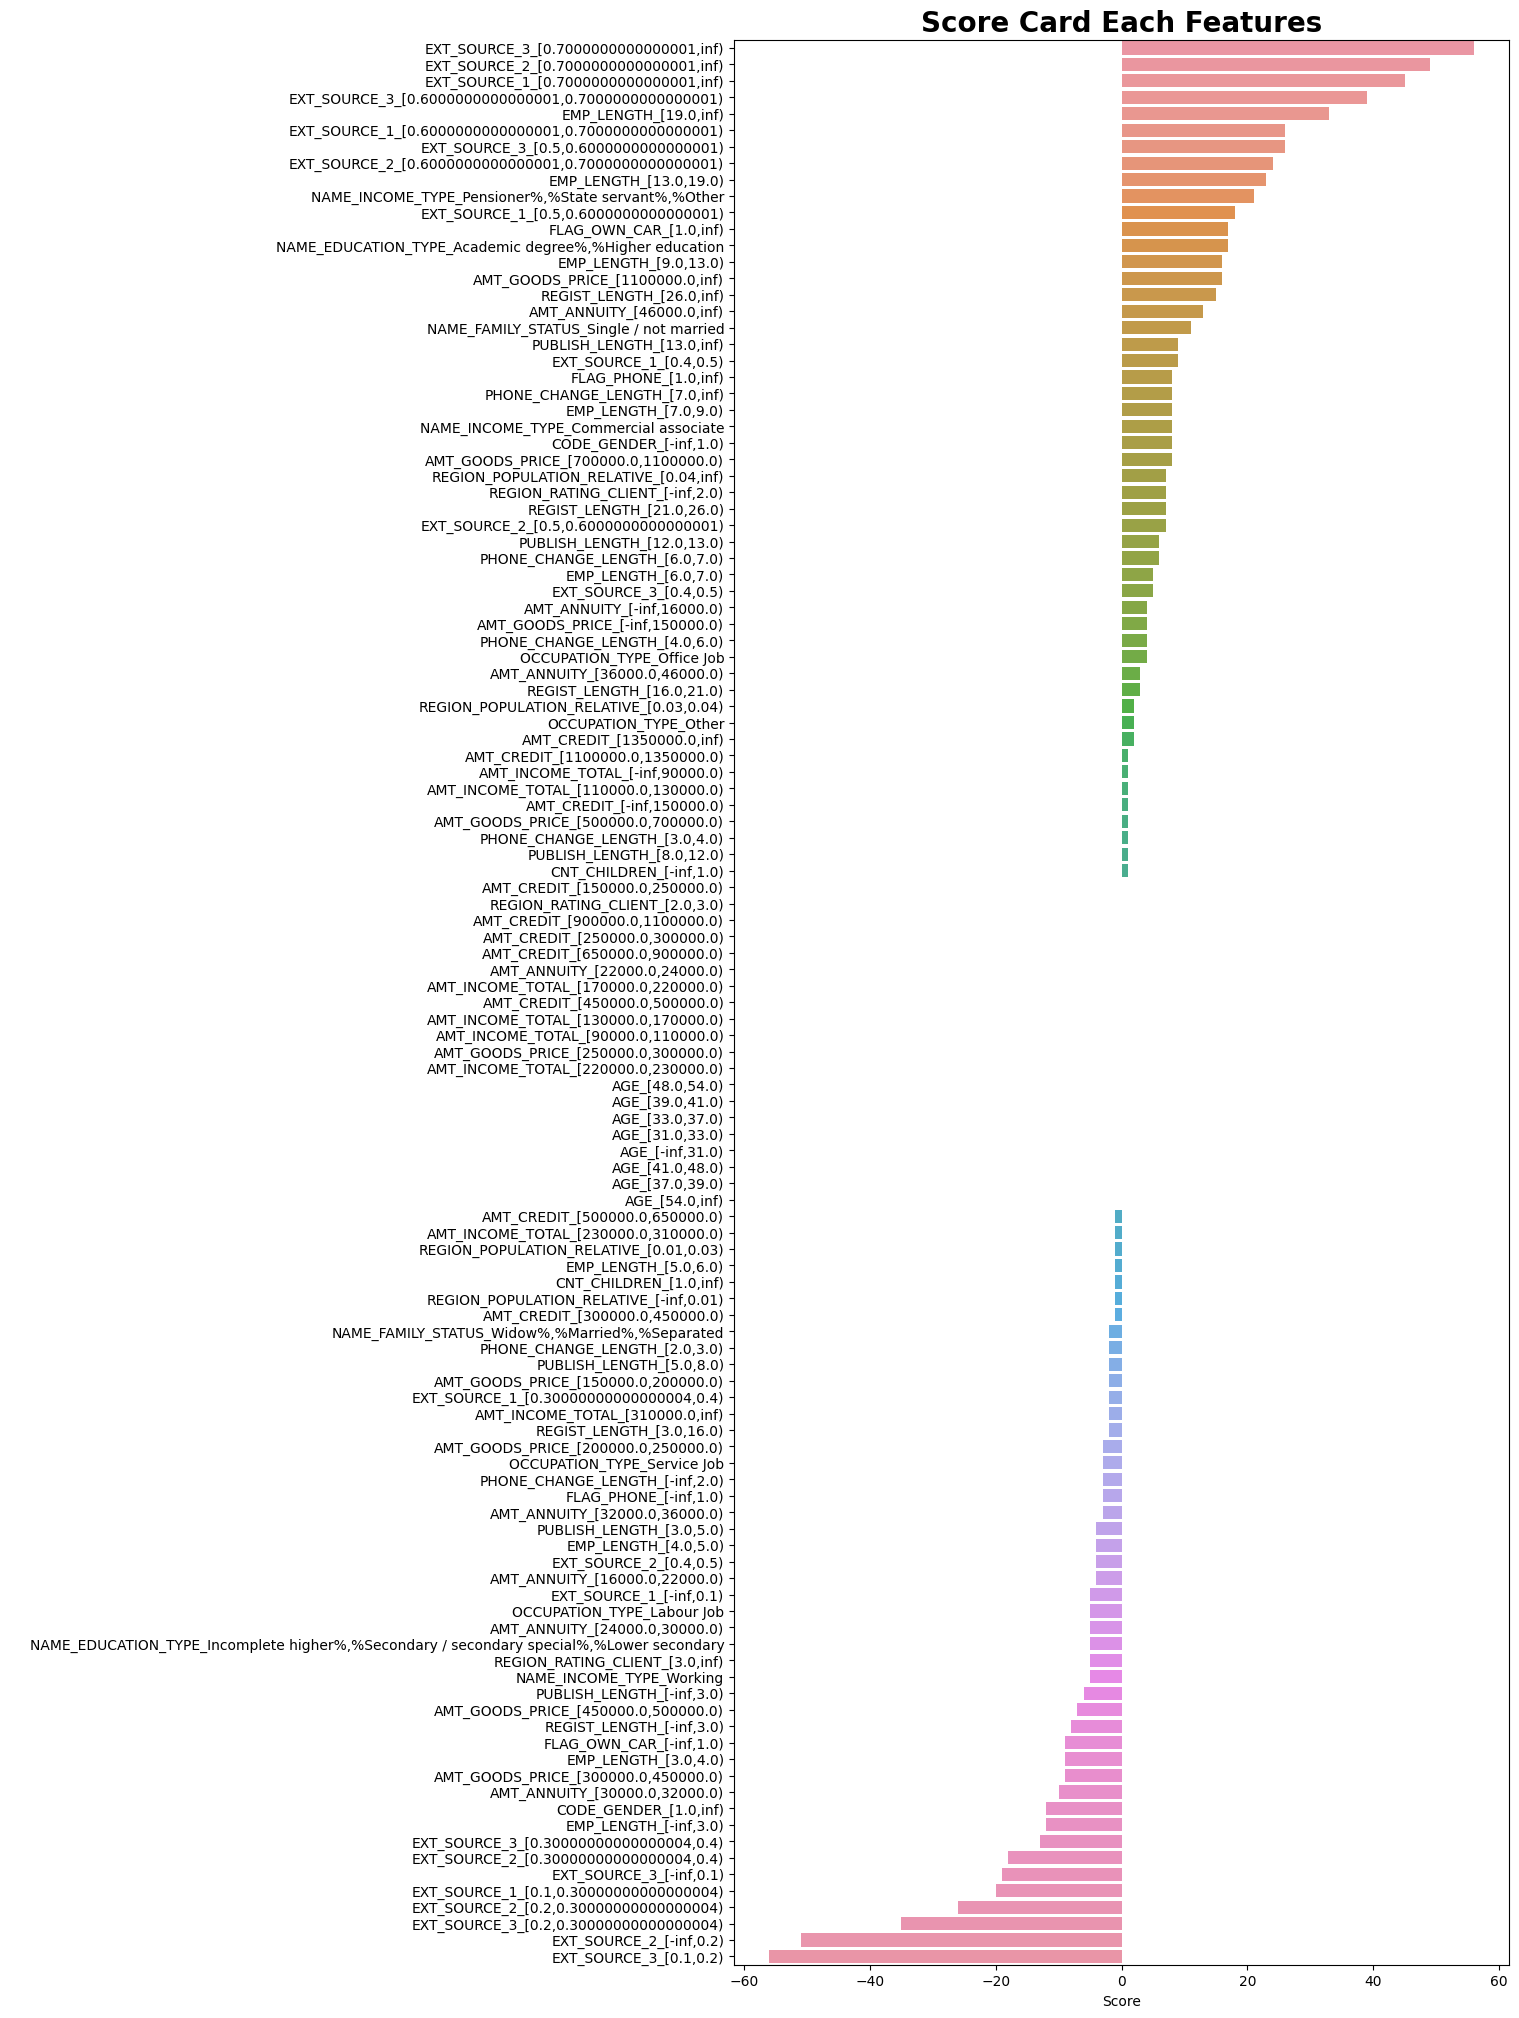

In [41]:
fig, ax = plt.subplots(figsize=(10, 25))
sns.barplot(x='points', y='feature', data=credit_score)
plt.ylabel(' ')
plt.xlabel('Score')
plt.title('Score Card Each Features', fontsize=20, weight='extra bold')

## Insights

In [42]:
df_score = sc.scorecard_ply(data, card, print_step=0)
credit_score_w_id = pd.merge(data, df_score, left_index = True, right_index = True)

In [43]:
credit_score_w_id['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
State servant            21703
Other                       33
Pensioner                   10
Name: NAME_INCOME_TYPE, dtype: int64

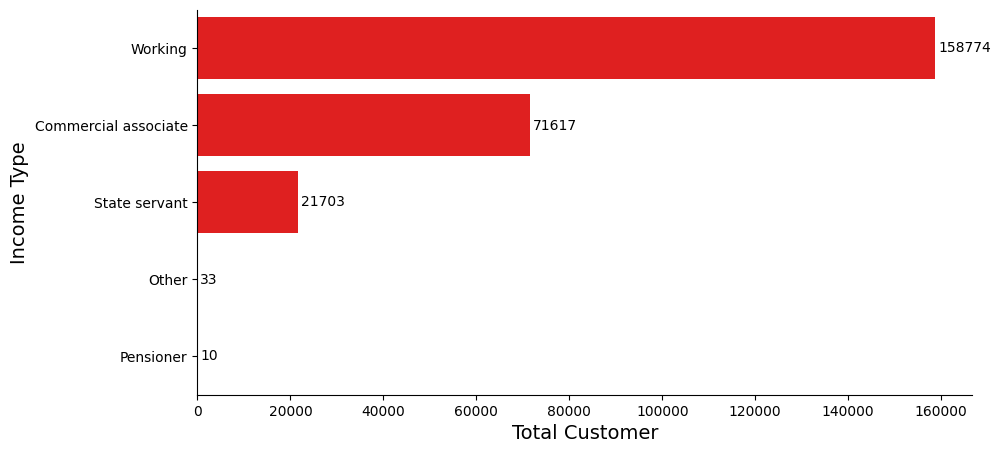

In [54]:
# Number Customer Income Type
income_type_vis = credit_score_w_id.groupby('NAME_INCOME_TYPE').agg(num_customer = ('SK_ID_CURR','count')).reset_index().sort_values('num_customer',ascending = False)
income_type_vis= income_type_vis.sort_values('num_customer',ascending = False)

# Visualization
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x='num_customer', y='NAME_INCOME_TYPE', data=income_type_vis, color='red')
plt.bar_label(ax.containers[0], padding=2)
plt.xlabel('Total Customer', fontsize=14)
plt.ylabel('Income Type', fontsize=14)
sns.despine()

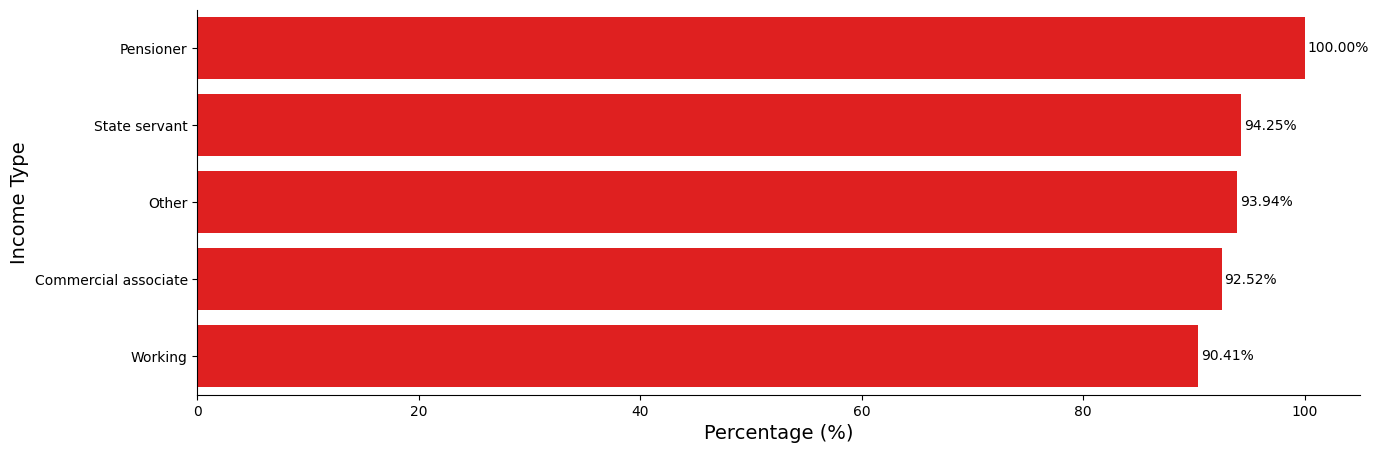

In [58]:
app_acc_income_type = credit_score_w_id.groupby(['NAME_INCOME_TYPE','TARGET']).agg(num_customer = ('SK_ID_CURR','count')).reset_index()
total_cust = app_acc_income_type.groupby('NAME_INCOME_TYPE').agg(total_customer = ('num_customer','sum')).reset_index()
app_acc_income_type_merge = app_acc_income_type.merge(total_cust,on = ['NAME_INCOME_TYPE'])
app_acc_income_type_merge['percentage'] = round(app_acc_income_type_merge['num_customer']/app_acc_income_type_merge['total_customer']*100, 2)
app_acc_income_type_merge = app_acc_income_type_merge.sort_values('percentage',ascending = False)
result_groupby_acc = app_acc_income_type_merge[(app_acc_income_type_merge['TARGET'] == 0)]

plt.style.use('default')
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(y='NAME_INCOME_TYPE', x='percentage', data=result_groupby_acc, color='red')
plt.bar_label(ax.containers[0], padding=2,fmt='%.2f%%')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Income Type', fontsize=14)
sns.despine()